# IFT870 - TP1 
### gibg2501 - leba 

In [14]:
# imports
import sklearn
from sklearn.decomposition import PCA
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# some setup
if sys.argv[1] == 'verbose':
    print('Executing in verbose mode:\tAll rows, columns and operations will be displayed')
    # The following 2 lines keeps all outputs and display them at the end of all cells
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = 'all'

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None

### cost of living head

In [15]:
cost_of_living = 'cost-of-living.csv'
cost_living_data = pd.read_csv(cost_of_living, index_col = 0)
cost_living_data.shape
cost_living_data.head()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States","Singapore, Singapore","Toronto, Canada","Auckland, New Zealand","Podgorica, Montenegro","Vancouver, Canada","Tokyo, Japan","Victoria, Canada","Winnipeg, Canada","Boston, MA, United States","Chicago, IL, United States","Almaty, Kazakhstan","Oslo, Norway","Frankfurt, Germany","Bratislava, Slovakia","Dallas, TX, United States","Zagreb, Croatia","Hamburg, Germany","Krakow (Cracow), Poland","Riga, Latvia","Gdansk, Poland","Santiago, Chile","Nairobi, Kenya","Abu Dhabi, United Arab Emirates","Houston, TX, United States","Tbilisi, Georgia","Dubai, United Arab Emirates","Bogota, Colombia","Brno, Czech Republic","Munich, Germany","Poznan, Poland","Las Vegas, NV, United States","London, United Kingdom","Los Angeles, CA, United States","Panama City, Panama","Seoul, South Korea","Warsaw, Poland","Prague, Czech Republic","Wroclaw, Poland","Kuala Lumpur, Malaysia","New York, NY, United States","Copenhagen, Denmark","Ljubljana, Slovenia","Chandigarh, India","Colombo, Sri Lanka","Noida, India","Kaunas, Lithuania","Athens, Greece","Phoenix, AZ, United States","Hong Kong, Hong Kong","Portland, OR, United States","Lisbon, Portugal","Beijing, China","Cape Town, South Africa","Tirana, Albania","Porto, Portugal","Durban, South Africa","Budapest, Hungary","Vilnius, Lithuania","Johannesburg, South Africa","Barcelona, Spain","San Diego, CA, United States","San Francisco, CA, United States","Lima, Peru","Seattle, WA, United States","Brasov, Romania","Bucharest, Romania","Tashkent, Uzbekistan","Ahmedabad, India","Cluj-Napoca, Romania","Madrid, Spain","Tallinn, Estonia","Bangalore, India","Iasi, Romania","Chennai, India","Doha, Qatar","Delhi, India","Gurgaon, India","Valencia, Spain","Vienna, Austria","Hyderabad, India","Montevideo, Uruguay","Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,8.33,13.75,11.95,5.0,11.69,8.19,12.05,10.31,13.47,13.47,4.77,18.70,10.0,6.0,13.48,6.72,11.0,5.91,7.0,5.91,6.94,4.43,6.12,13.48,4.67,7.33,3.30,5.95,12.0,5.90,13.47,17.49,13.47,8.98,6.42,5.91,5.95,5.91,2.87,17.97,17.40,8.0,2.54,1.49,3.80,6.0,10.0,10.77,5.78,12.58,8.5,3.91,8.91,4.10,7.0,7.47,5.99,7.0,8.47,11.0,13.48,15.95,3.26,13.48,6.27,6.28,3.59,1.90,5.23,12.0,8.0,2.53,5.23,1.52,6.18,3.80,3.80,8.75,10.00,1.90,8.41,15.5

### cost of living described

In [16]:
cost_living_data.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States","Singapore, Singapore","Toronto, Canada","Auckland, New Zealand","Podgorica, Montenegro","Vancouver, Canada","Tokyo, Japan","Victoria, Canada","Winnipeg, Canada","Boston, MA, United States","Chicago, IL, United States","Almaty, Kazakhstan","Oslo, Norway","Frankfurt, Germany","Bratislava, Slovakia","Dallas, TX, United States","Zagreb, Croatia","Hamburg, Germany","Krakow (Cracow), Poland","Riga, Latvia","Gdansk, Poland","Santiago, Chile","Nairobi, Kenya","Abu Dhabi, United Arab Emirates","Houston, TX, United States","Tbilisi, Georgia","Dubai, United Arab Emirates","Bogota, Colombia","Brno, Czech Republic","Munich, Germany","Poznan, Poland","Las Vegas, NV, United States","London, United Kingdom","Los Angeles, CA, United States","Panama City, Panama","Seoul, South Korea","Warsaw, Poland","Prague, Czech Republic","Wroclaw, Poland","Kuala Lumpur, Malaysia","New York, NY, United States","Copenhagen, Denmark","Ljubljana, Slovenia","Chandigarh, India","Colombo, Sri Lanka","Noida, India","Kaunas, Lithuania","Athens, Greece","Phoenix, AZ, United States","Hong Kong, Hong Kong","Portland, OR, United States","Lisbon, Portugal","Beijing, China","Cape Town, South Africa","Tirana, Albania","Porto, Portugal","Durban, South Africa","Budapest, Hungary","Vilnius, Lithuania","Johannesburg, South Africa","Barcelona, Spain","San Diego, CA, United States","San Francisco, CA, United States","Lima, Peru","Seattle, WA, United States","Brasov, Romania","Bucharest, Romania","Tashkent, Uzbekistan","Ahmedabad, India","Cluj-Napoca, Romania","Madrid, Spain","Tallinn, Estonia","Bangalore, India","Iasi, Romania","Chennai, India","Doha, Qatar","Delhi, India","Gurgaon, India","Valencia, Spain","Vienna, Austria","Hyderabad, India","Montevideo, Uruguay","Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000

In [17]:
cost_living_data_t = cost_living_data.transpose()
cost_living_data_t.head()
cost_living_data_t.columns

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
      

### Fetch data entries containing 'apartment'

In [18]:
# features_logement = []
# for x in cost_living_data_t:
#     if('Apartment' in x):
#         features_logement.append(x)

# creates spending items filters to extract features sharing a comon them (eg. food, clothing, logment, etc)
features_logement = [spending_item for spending_item in cost_living_data_t if('Apartment' in spending_item)]
features_clothing = [spending_item for spending_item in cost_living_data_t if('Apartment' in spending_item)]

features_logement
l = cost_living_data_t[features_logement]
x.shape
x

,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre
"Saint Petersburg, Russia",524.45,344.27,1012.53,615.19,102.17,2476.05,1507.70
"Istanbul, Turkey",291.55,177.72,545.50,314.98,59.33,1315.18,657.05
"Izmir, Turkey",212.22,128.36,353.76,225.34,51.07,856.54,508.14
"Helsinki, Finland",986.93,758.13,1819.32,1271.16,82.66,7444.54,4099.36
"Chisinau, Moldova",244.49,177.96,428.67,330.84,113.46,904.82,589.13
"Milan, Italy",1099.67,731.69,2311.84,1428.30,163.97,8221.95,3719.51
"Cairo, Egypt",188.00,109.76,352.74,229.29,25.79,695.67,407.03
"Banja Luka, Bosnia And Herzegovina",219.72,159.73,398.18,259.32,141.04,1328.34,1008.17
"Baku, Azerbaijan",290.07,157.97,608.91,299.45,42.65,1307.40,647.53
"Guadalajara, Mexico",309.42,186.98,634.96,388.33,22.64,1016.15,922.24


##### Plot apartments data to see correlation using pairplot

/home/ggs22/.venv_ift725/lib/python3.6/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


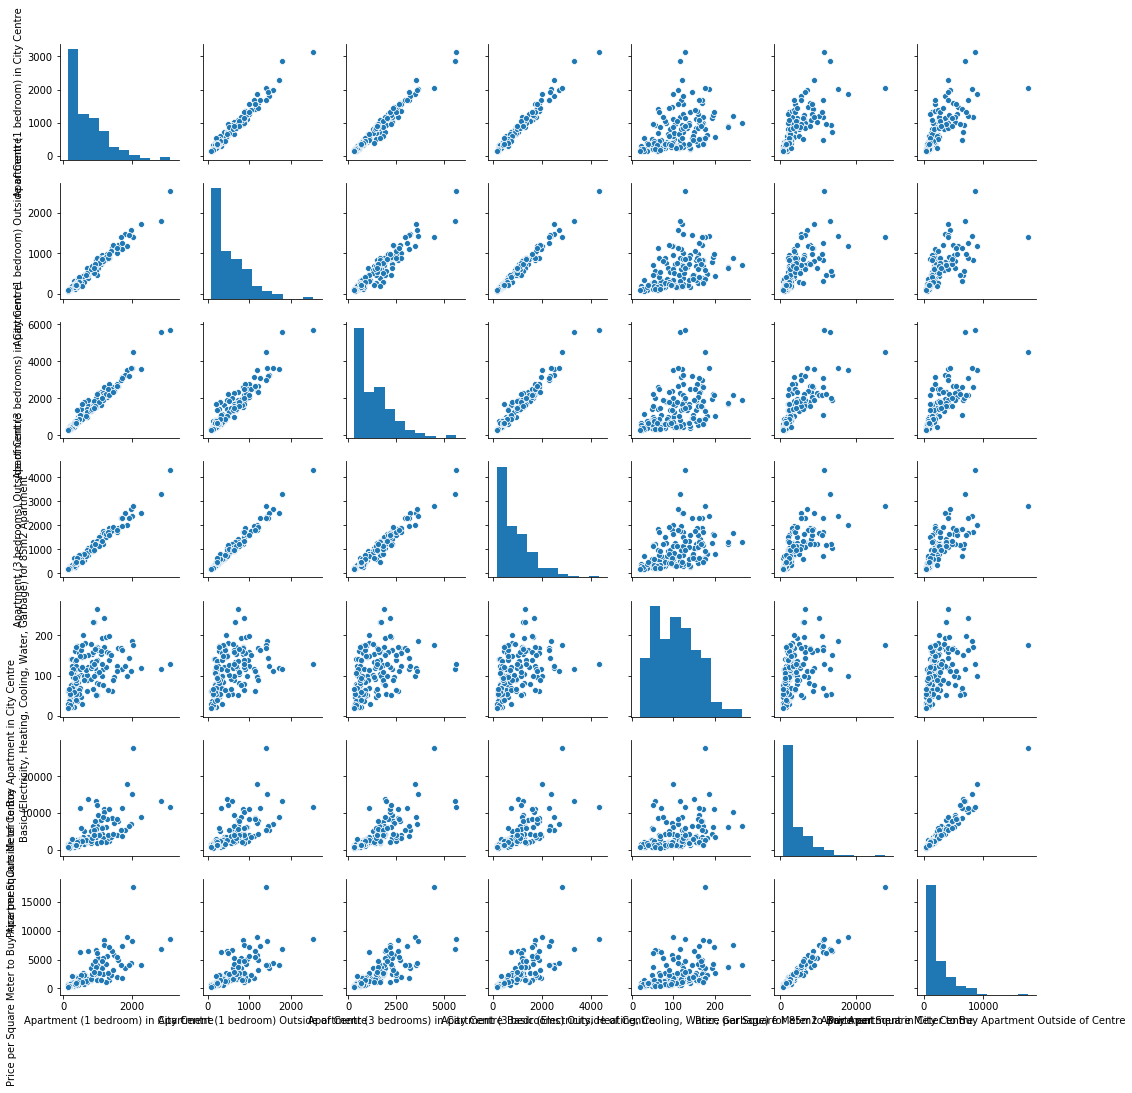

In [19]:
%matplotlib inline
sns.pairplot(x)